# SUPERVISED LEARNING: LOGISTIC REGRESSION

### Predicting probabilities

In this notebook, we are going to use regression in a nonlinear situation.

In many cases, we want to build a predictive model that tells us a yes/no outcome. If we wanted to predict whether the outcome is yes or no, we would need to use classification. If we want to predict the probability that an event happens, we can use a special form of regression.

This special form of regression is not linear. Linear regression means that we predict values between [negative infinity, positive infinity]. Predicting a probability limits us to the [0,1] interval, so we use nonlinear regression.

Predicting the probability that a binomial, yes/no event occurs is the perfect use of `logistic regression`. 

*Note: Our model predicts the probability of event B happening.*

### Install and load packages

In [6]:
#install.packages("dplyr", verbose = FALSE)
install.packages("ggplot2", verbose = FALSE)
install.packages("vtreat", verbose = FALSE)
install.packages("tidyverse", verbose = FALSE)
install.packages("WVPlots", verbose = FALSE)

#library(dplyr, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(vtreat, quietly = TRUE)
library(tidyverse, quietly = TRUE)
library(WVPlots, quietly = TRUE)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("tidyverse", verbose = FALSE):
“installation of package ‘tidyverse’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


### Create data

This data is not reflective of reality and is used to demonstrate the modeling process only

In [7]:
# Create input variables
set.seed(40)

id <- 1:400
cumGPA <- rnorm(400, 2.6, 0.8)
cumGPA <- ifelse(cumGPA > 4, 4, cumGPA)
scoreLMS <- rnorm(400, 80, 10)
scoreLSM <- ifelse(scoreLMS > 100, 100, scoreLMS)
scoreLMS <- round(scoreLMS, digits=1)

# Simulate outcome data
success <- sample(c(TRUE), 400, replace = TRUE)

for (i in 1:400) {
    if (cumGPA[i] < 2.0) {success[i] = FALSE}
    if (scoreLMS[i] < 55) {success[i] = FALSE}
}

# Add in some random error for success
#error <- runif(400, min = 0, max =1)
#for (i in 1:400) {
#    if (error[i] > 0.97) {
#        success[i] = TRUE
#    } 
#}

# Create dataframe 
SData <- data.frame(id, success, cumGPA, scoreLMS)

head(SData, 10)


id,success,cumGPA,scoreLMS
1,TRUE,2.982191,95.7
2,TRUE,2.996946,84.5
3,FALSE,1.912333,84.4
4,FALSE,1.936752,82.6
5,TRUE,2.342742,87.9
6,FALSE,1.556984,75.9
7,FALSE,1.462811,93.7
8,TRUE,3.995932,56.5
9,TRUE,2.369377,90.8
10,FALSE,1.552907,81.3


### Create logistic regression model

In [8]:
# Formula expressing success as a function of cumGPA and onlineBefore
sformula <- success ~ cumGPA + scoreLMS

# Fit the logistic regression model
model <- glm(sformula, data = SData, family = binomial)

# View summary, diagnostics, and pseudo-R-squared of model
summary(model)
(perf <- broom::glance(model))
(pseudoR2 <- 1 - (perf$deviance/perf$null.deviance))


Call:
glm(formula = sformula, family = binomial, data = SData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7623   0.0000   0.0013   0.0457   1.2464  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -28.00375    5.17203  -5.414 6.15e-08 ***
cumGPA       12.18447    1.97269   6.177 6.55e-10 ***
scoreLMS      0.04423    0.02964   1.492    0.136    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 428.990  on 399  degrees of freedom
Residual deviance:  82.972  on 397  degrees of freedom
AIC: 88.972

Number of Fisher Scoring iterations: 9


null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual
428.9903,399,-41.48591,88.97182,100.9462,82.97182,397


[1] 0.8065881

We can interpret the coefficients as 

The model's R squared is about listed above. This means the model explains about that percent of the data, and our model is decent but not great. 

*Note: Again, this model was trained on fictional data, so the R-squared value is also completely fictional.*

### Use model to predict values 

In [9]:
SData$pred <- predict(model, type = "response")

head(SData,4)

id,success,cumGPA,scoreLMS,pred
1,TRUE,2.982191,95.7,0.9999965
2,TRUE,2.996946,84.5,0.9999952
3,FALSE,1.912333,84.4,0.2749116
4,FALSE,1.936752,82.6,0.3204026


### Use a Gain Curve to evaluate performance visually

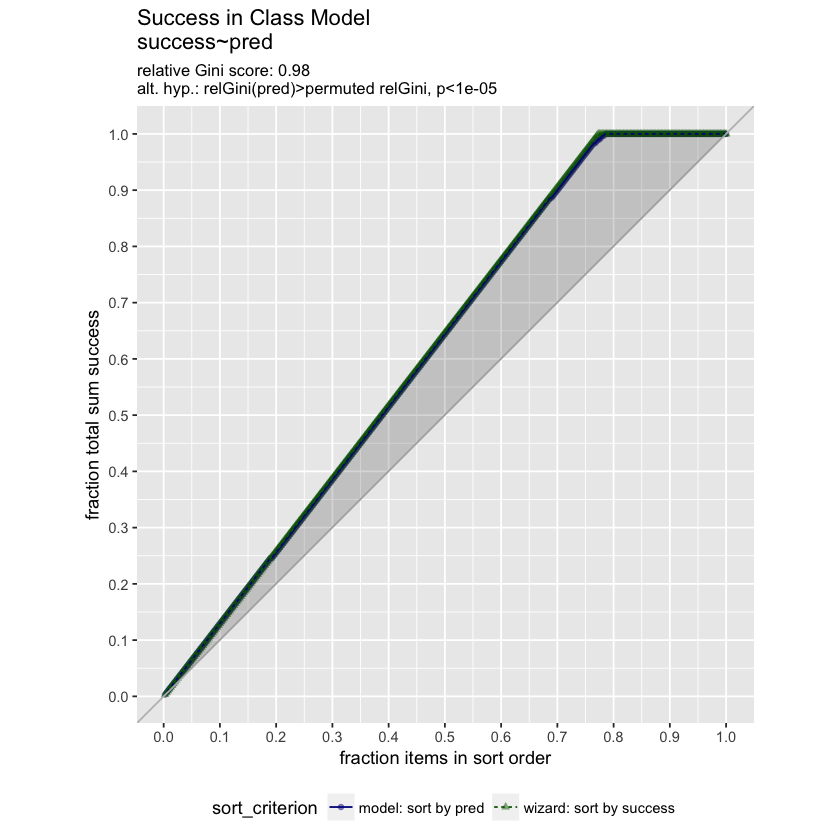

In [194]:
GainCurvePlot(SData, "pred", "success", "Success in Class Model")

### INTERPRETATION AND CONCLUSION

Our model fits closely to the "wizard" gain curve, meaning our model predicted that the students who would succeed in the online class actually did succeed.